<a href="https://colab.research.google.com/github/rr1989/capstone-project-recommendation-system-by-rr/blob/main/Final_Capstone_Sentiment_Model_by_Rakesh_Sept_9th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Read Dataset 

In [8]:
import pandas as pd

In [9]:
Ebuss_df = pd.read_csv("sample30.csv")

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

#4/1AX4XfWia6njZ9vVibgqaEcY-xbnjkB1M_h84ECS97pbmu3G5fQkCb2cVSuw

In [11]:
Ebuss_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


### 2. Exploratory data analysis

In [12]:
null_data = Ebuss_df.isnull().sum()

In [13]:
null_data

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

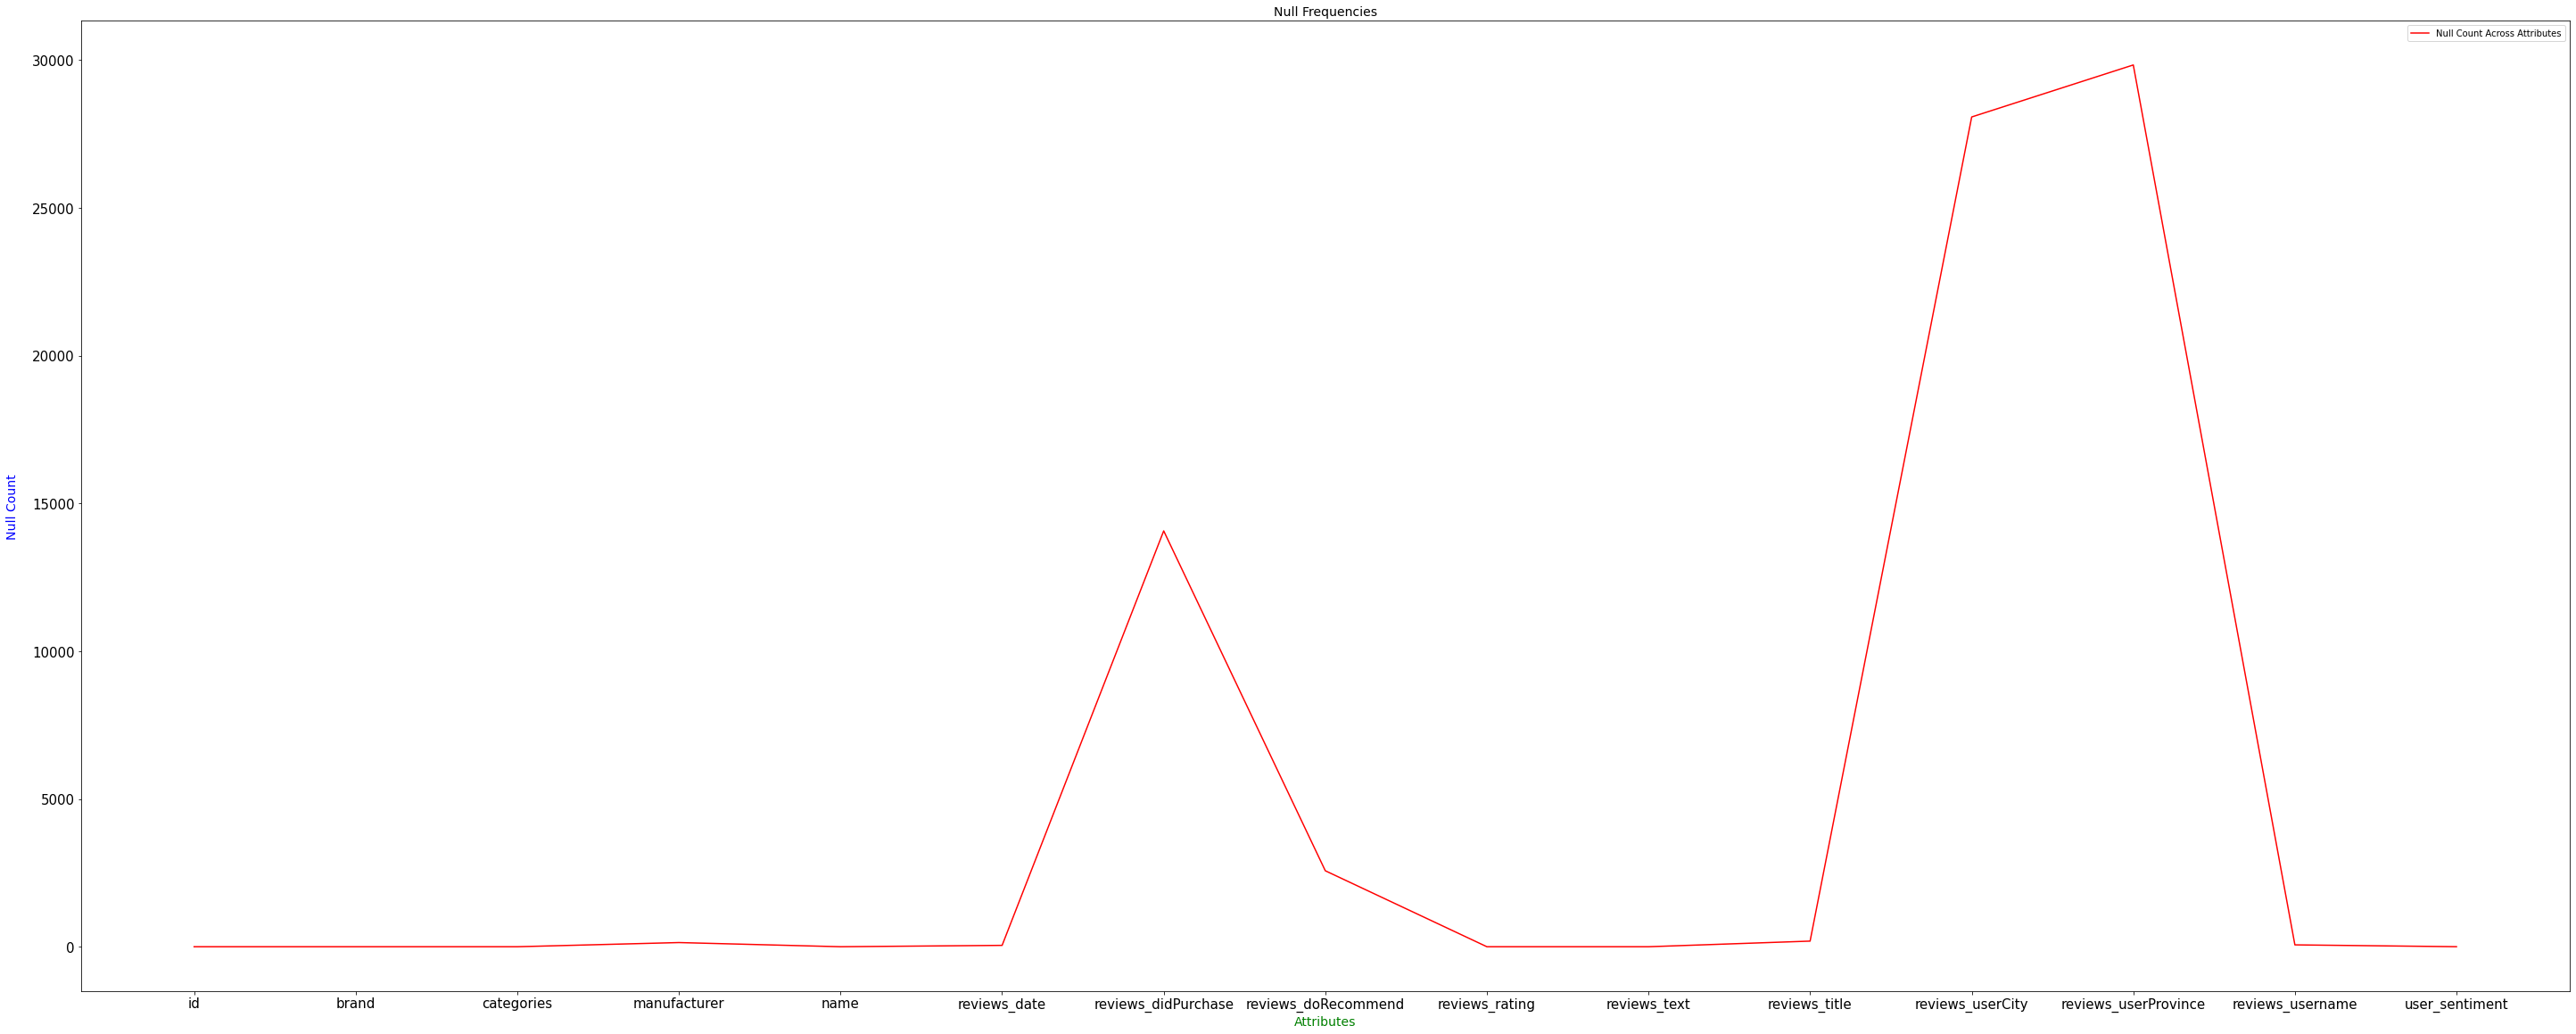

In [15]:
fig = plt.figure(figsize=(50, 20))
data_plot = plt.plot(null_data.index,null_data,label='Null Count Across Attributes',color='r')
plt.title('Null Frequencies',fontsize=14)
plt.xlabel('Attributes',color = 'g',fontsize=14)
plt.ylabel('Null Count',color = 'b',fontsize=14,labelpad=15)
plt.legend()
plt.tick_params(labelsize=15);
plt.show()

#!pip install mpld3
#import mpld3
#labels = ['point {0}'.format(i + 1) for i in range(100)]
#tooltip = mpld3.plugins.PointLabelTooltip(data_plot, labels=labels)
#mpld3.plugins.connect(fig, tooltip)
#mpld3.show()


##### Observations :

> missing values are maximum for below mentioned attributes.

a. reviews_didPurchase 
b. reviews_userCity
c. reviews_userProvince

### We have to predict review_rating based on the review_text. So we'll be ultimately concentrating there but let's perform EDA on other attributes to understand the dataset

##### Top 10 brands

In [16]:
Ebuss_df["brand"].value_counts().sort_values(ascending=False).head(10)


Clorox                  10585
Warner Home Video        3325
Disney                   1200
L'oreal Paris            1186
FOX                       887
Burt's Bees               881
Sony Pictures             845
Summit Entertainment      813
Nexxus                    693
Universal Home Video      668
Name: brand, dtype: int64

##### Top 10 categories 

In [17]:
Ebuss_df["categories"].value_counts().sort_values(ascending=False).head(10)

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8545
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                   3325
Household Chemicals,Household Cleaners,Bath & 

##### Top 10 manufacturer 

In [18]:
Ebuss_df["manufacturer"].value_counts().sort_values(ascending=False).head(10)

Clorox                    8546
Test                      3325
AmazonUs/CLOO7            2039
L'oreal Paris             1232
Walt Disney               1143
Burt's Bees                873
SONY CORP                  845
Twentieth Century Fox      757
P&G                        730
Nexxus Beauty Products     693
Name: manufacturer, dtype: int64

##### Top 10 Product name

In [19]:
Ebuss_df["name"].value_counts().sort_values(ascending=False).head(10)

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3325
Clorox Disinfecting Bathroom Cleaner                                              2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)               1143
Burt's Bees Lip Shimmer, Raisin                                                    873
The Resident Evil Collection 5 Discs (blu-Ray)                                     845
Mike Dave Need Wedding Dates (dvd + Digital)                                       757
Nexxus Exxtra Gel Style Creation Sculptor                                          693
Red (special Edition) (dvdvideo)                                                   672
Name: name, dtype: int64

##### Whether a particular user has purchased the product or not

In [20]:
Ebuss_df["reviews_didPurchase"].value_counts().sort_values(ascending=False).head(10)

False    14498
True      1434
Name: reviews_didPurchase, dtype: int64

##### Whether a particular user has recommended the product or not

In [21]:
Ebuss_df["reviews_doRecommend"].value_counts().sort_values(ascending=False).head(10)

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

##### Top 5 reviews_rating 

In [22]:
Ebuss_df["reviews_rating"].value_counts().sort_values(ascending=False).head(5)

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

In [23]:
ratings = Ebuss_df["reviews_rating"].value_counts()

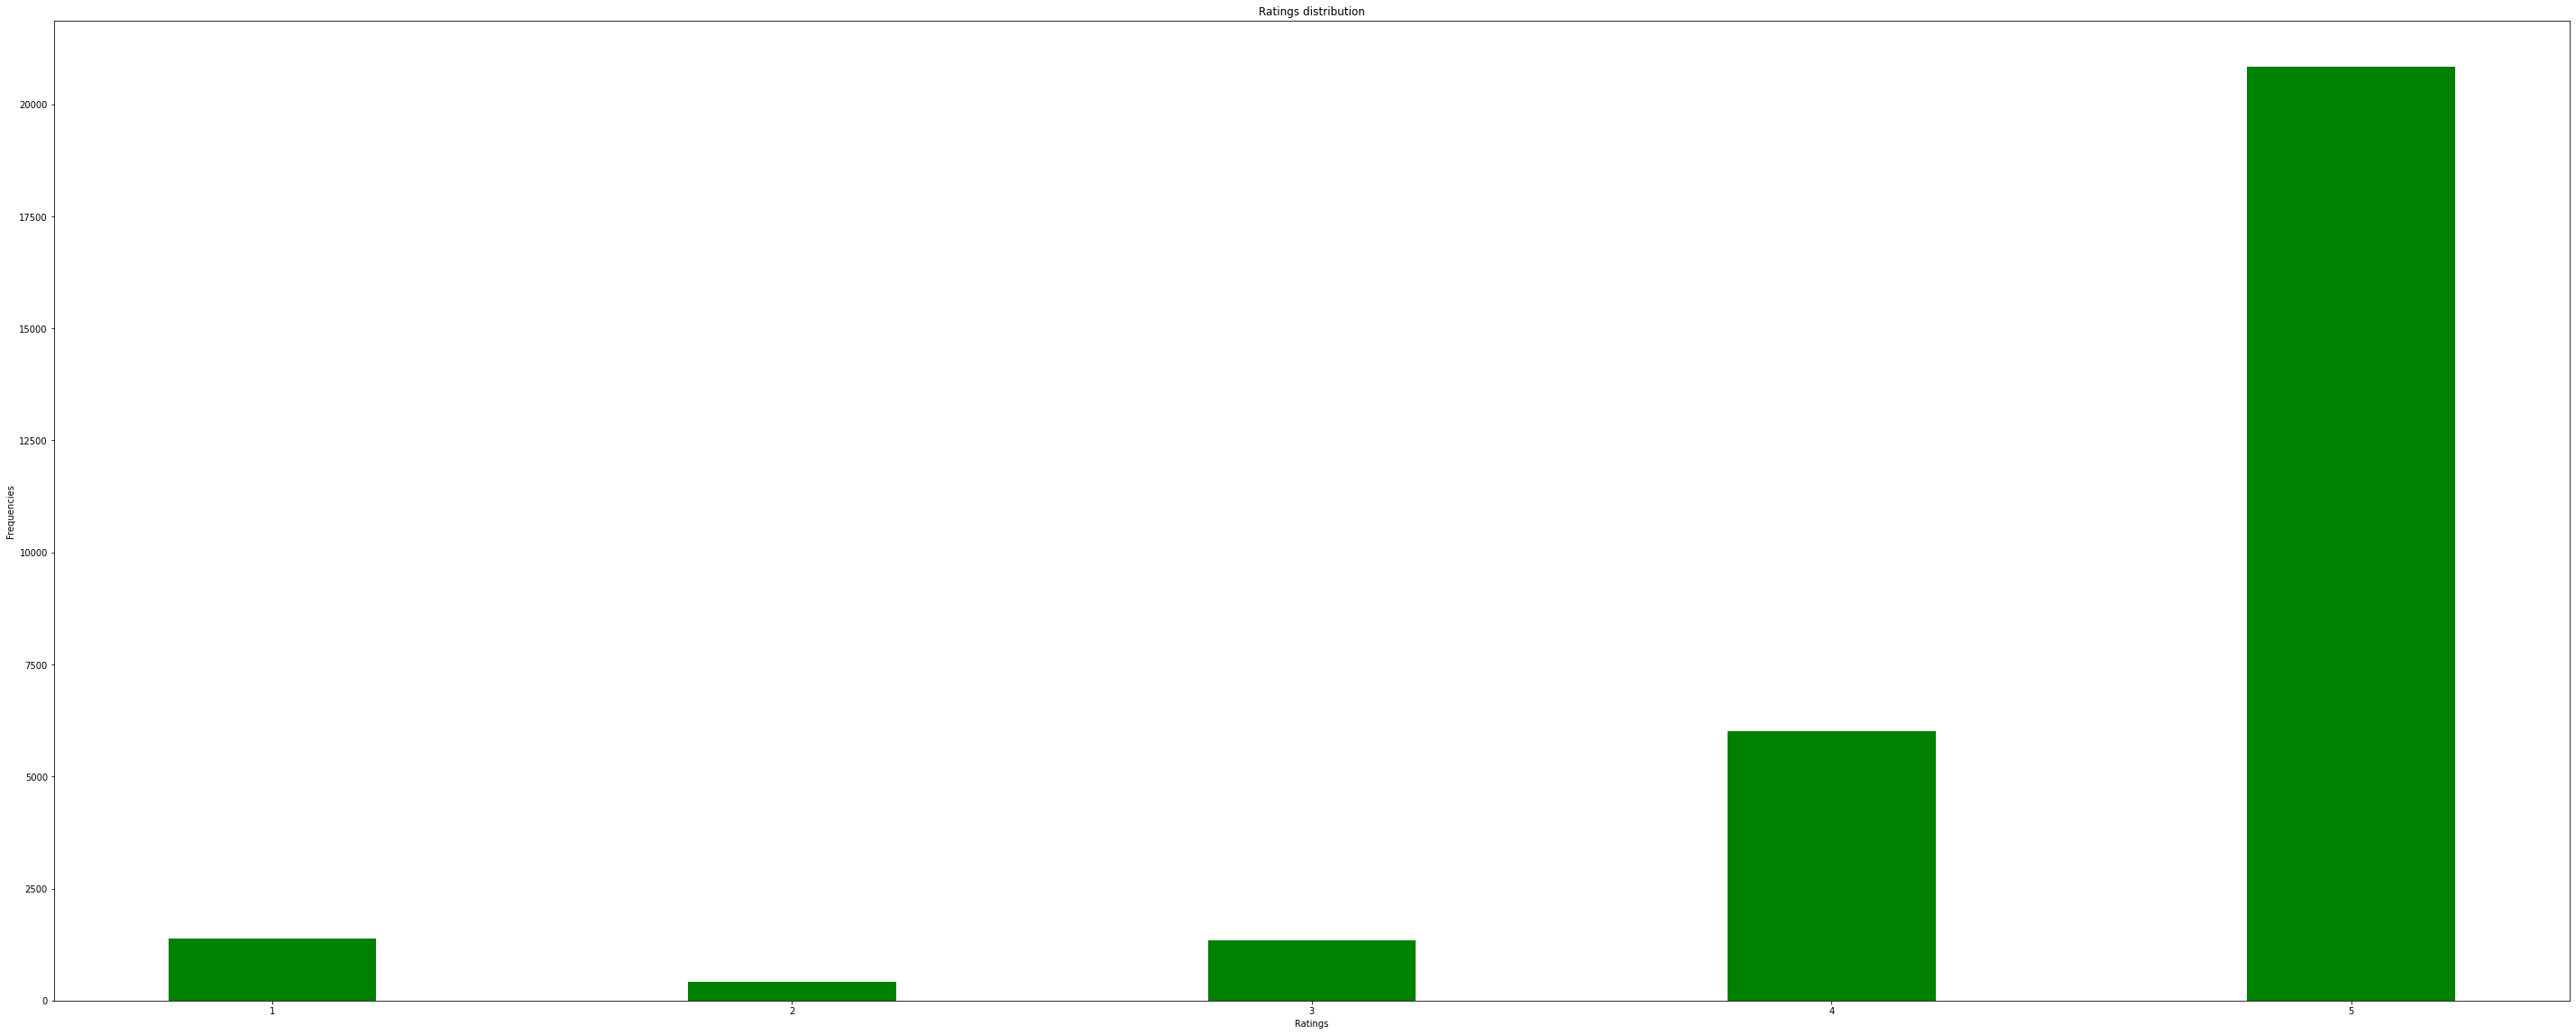

In [24]:
fig = plt.figure(figsize=(50, 20))

plt.bar(ratings.index, ratings.values, color ='g',
        width = 0.4)
 
plt.xlabel("Ratings")
plt.ylabel("Frequencies")
plt.title("Ratings distribution")
plt.show()

In [25]:
ratings.values

array([20831,  6020,  1384,  1345,   420])

##### Now trying to find the length of review comments for different review ratings . So first we are trying to derive reviews length

In [26]:
Ebuss_df['reviews_length']=Ebuss_df['reviews_text'].apply(len)

In [27]:
Ebuss_df['reviews_length']

0        201
1         62
2         12
3        696
4        132
        ... 
29995    222
29996    119
29997    250
29998    335
29999    272
Name: reviews_length, Length: 30000, dtype: int64

In [28]:
gk = Ebuss_df.groupby(['reviews_rating','reviews_length'])


In [29]:
gk.first()


id  ... user_sentiment
reviews_rating reviews_length                        ...               
1              14              AVpfBU2S1cnluZ0-cJsO  ...       Negative
               16              AVpfPPkEilAPnD_xX3cP  ...       Negative
               17              AVpfPPkEilAPnD_xX3cP  ...       Negative
               19              AVpfPPkEilAPnD_xX3cP  ...       Negative
               22              AVpf5olc1cnluZ0-tPrO  ...       Negative
...                                             ...  ...            ...
5              3132            AVpfNfEMLJeJML434uf-  ...       Positive
               3392            AVpfNfEMLJeJML434uf-  ...       Positive
               5664            AVpe9W4D1cnluZ0-avf0  ...       Positive
               5711            AVpe9W4D1cnluZ0-avf0  ...       Positive
               5865            AVpe9W4D1cnluZ0-avf0  ...       Positive

[2830 rows x 14 columns]

In [30]:
reviews = Ebuss_df.groupby('reviews_rating')['reviews_length'].mean().sort_values()


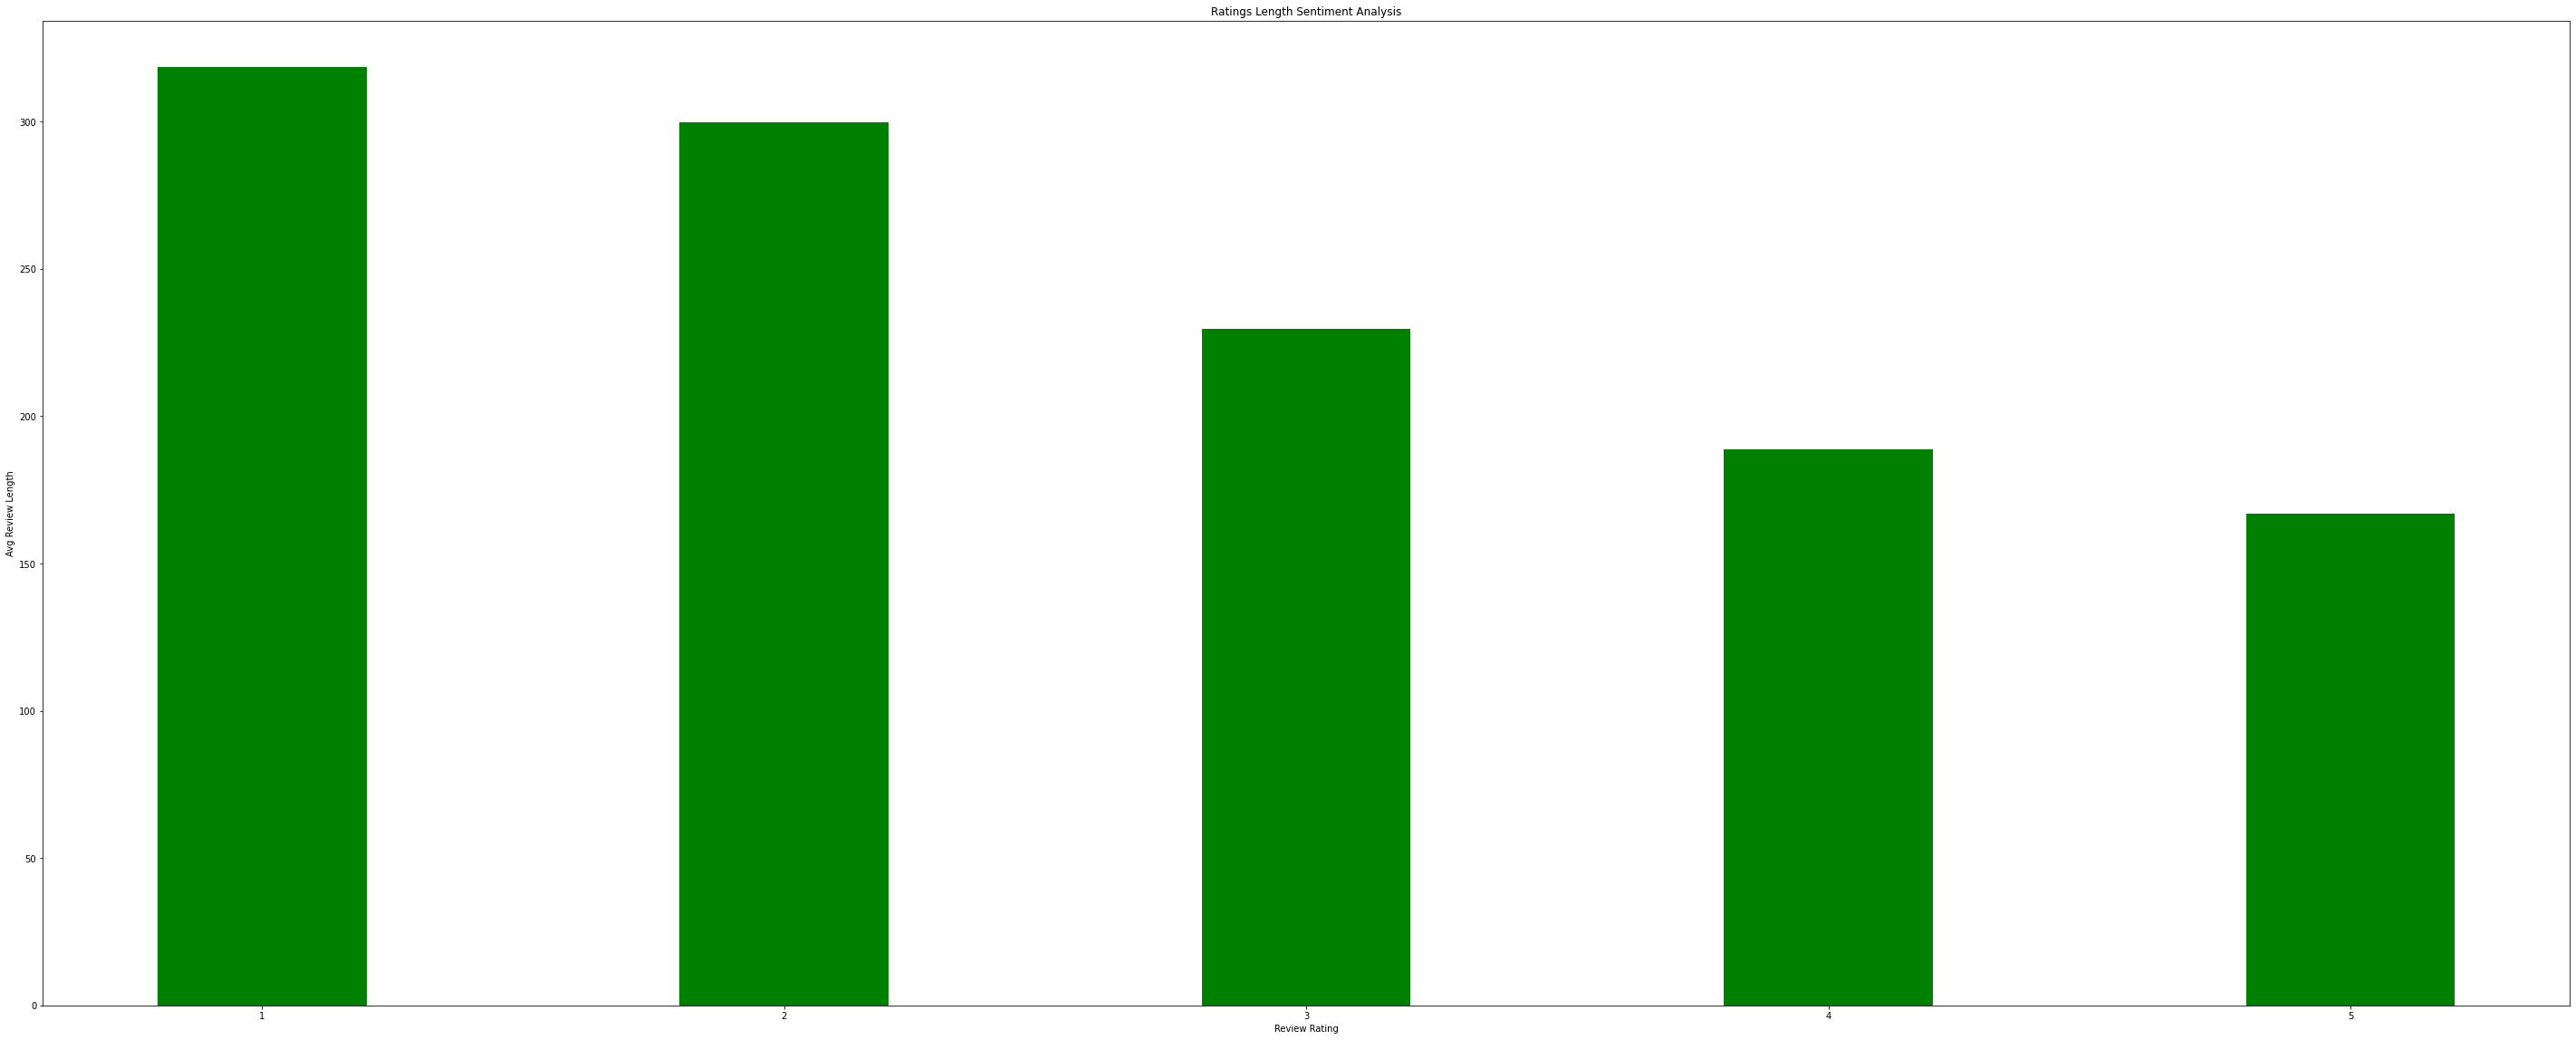

In [31]:
fig = plt.figure(figsize=(50, 20))

plt.bar(reviews.index, reviews.values, color ='g',
        width = 0.4)
 
plt.xlabel("Review Rating")
plt.ylabel("Avg Review Length")
plt.title("Ratings Length Sentiment Analysis")
plt.show()

##### Observations : We have observed that most users have given 5 ratings but they have written more in detail while giving 1 rating

##### User Sentiments Stat

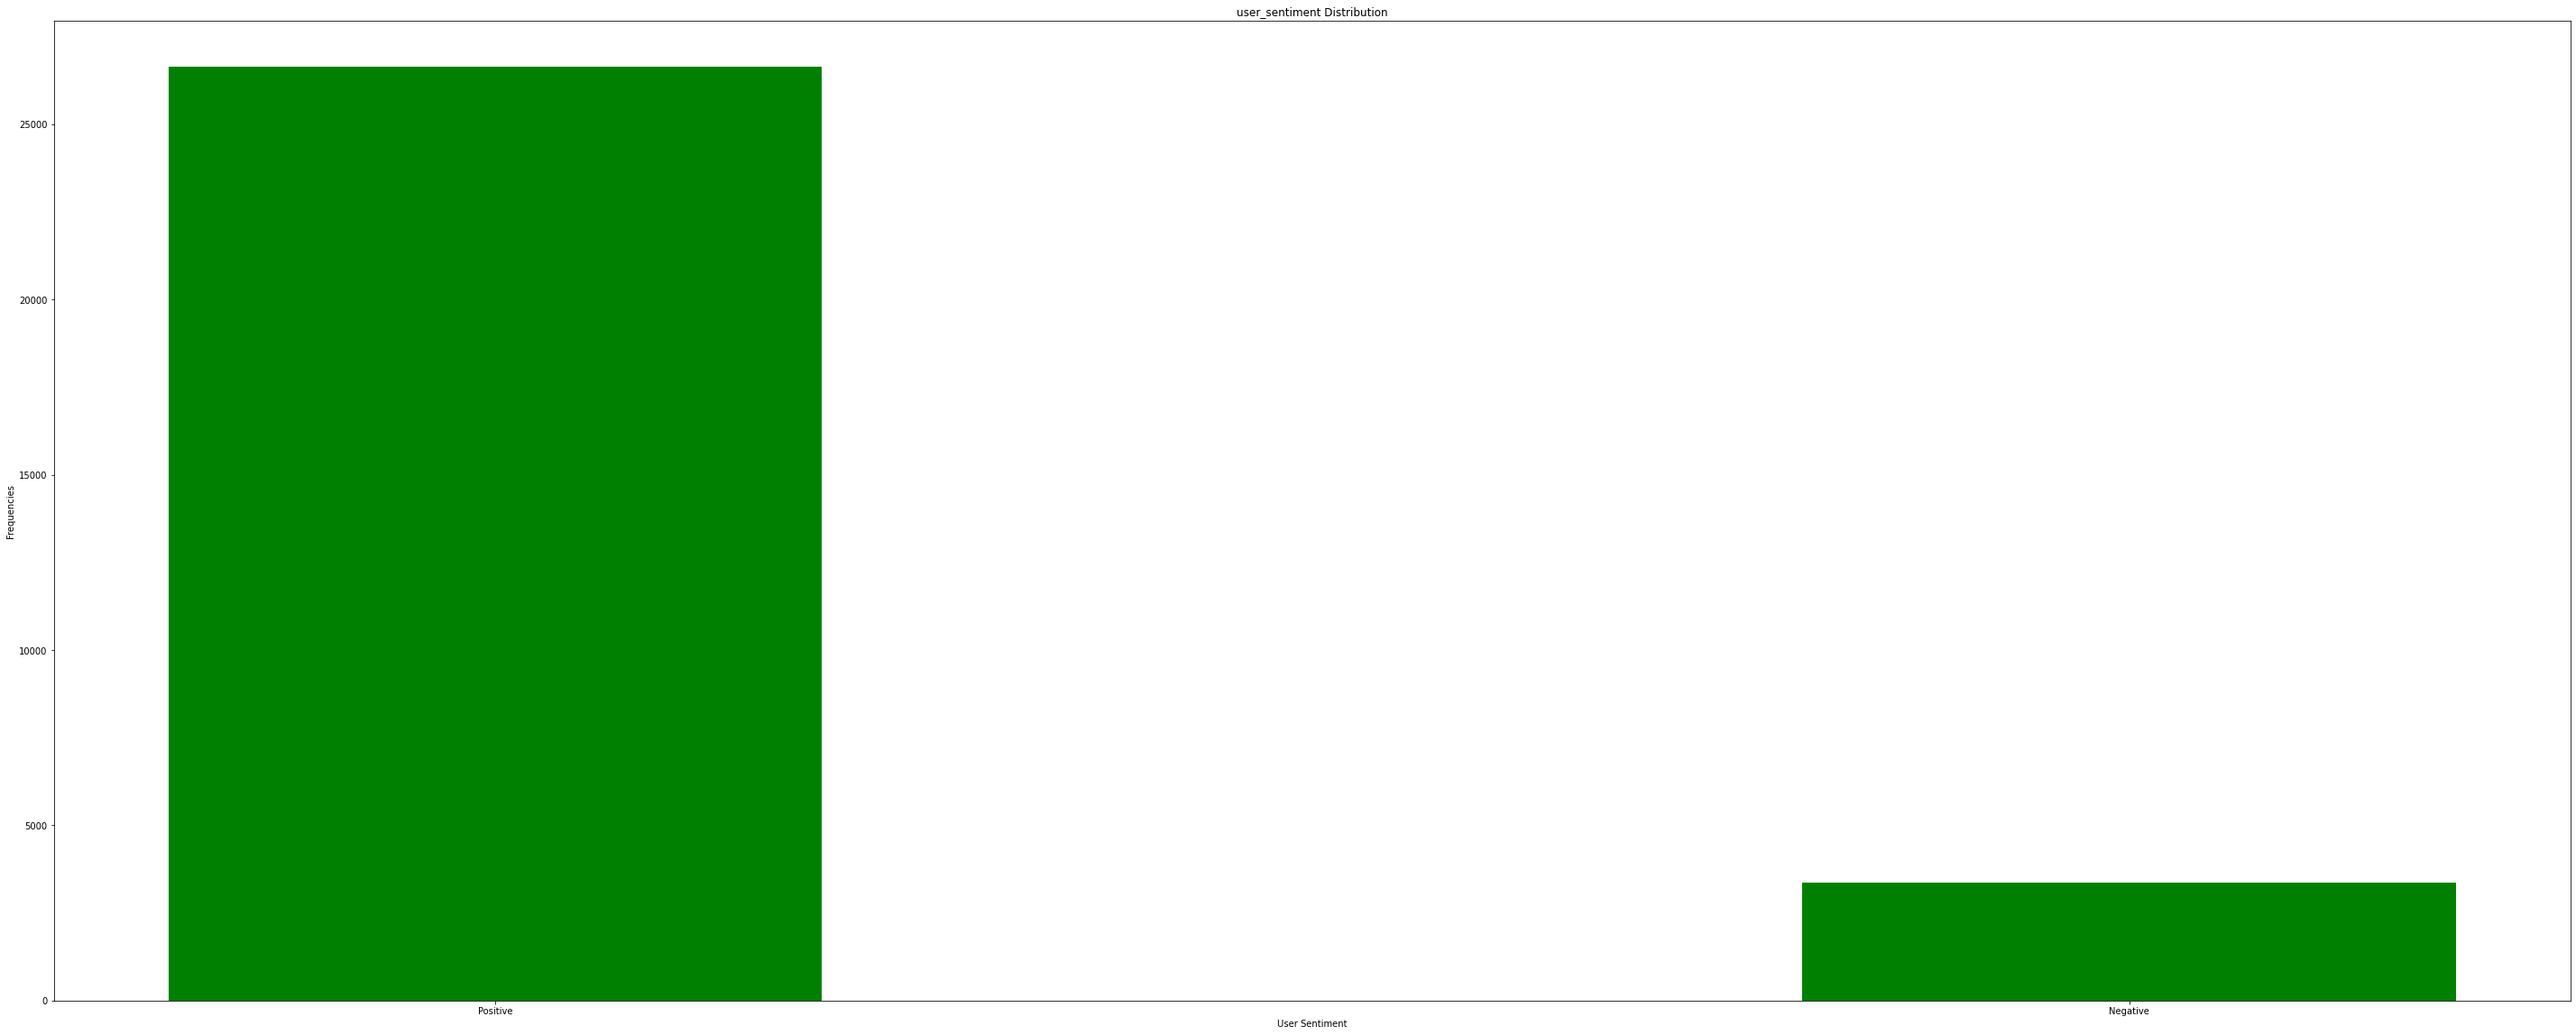

In [32]:

user_sentiment = Ebuss_df["user_sentiment"].value_counts()

fig = plt.figure(figsize=(50, 20))

plt.bar(user_sentiment.index, user_sentiment.values, color ='g',
        width = 0.4)
 
plt.xlabel("User Sentiment")
plt.ylabel("Frequencies")
plt.title("user_sentiment Distribution")
plt.show()


##### Observation - Postive response are more 

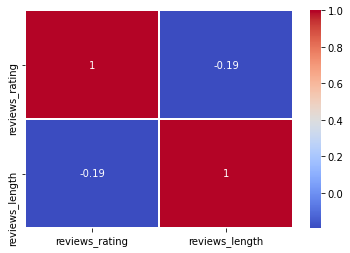

In [33]:
sns.heatmap(Ebuss_df.corr(),cmap='coolwarm',annot=True,linewidths=.5)


##### Observation - review_ratings are negatively correlated to review comment size 

In [34]:
Ebuss_df.shape

(30000, 16)

##### Observation - 30,000 rows * 16 columns 

In [35]:
Ebuss_df.describe()

,reviews_rating,reviews_length
count,30000.000000,30000.000000
mean,4.483133,183.056967
std,0.988441,186.054147
min,1.000000,2.000000
25%,4.000000,83.000000
50%,5.000000,131.000000
75%,5.000000,217.000000
max,5.000000,5865.000000


In [36]:
Ebuss_df.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
reviews_length           int64
dtype: object

### 3. Data cleaning

In [37]:
Ebuss_df_subset = Ebuss_df.dropna(subset=['reviews_text'])


##### Observation - dropping rows where review_text is NULL and storing it into a new dataframe

In [38]:
X = Ebuss_df_subset['reviews_text']
y = Ebuss_df_subset['reviews_rating']


### 4. Feature extraction: In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.

In [39]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer




In [40]:
review_text=Ebuss_df_subset['reviews_text']
train_text=Ebuss_df_subset['reviews_text']

In [41]:
type(train_text)

pandas.core.series.Series

##### TF-IDF

In [42]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(review_text)
train_word_features = word_vectorizer.transform(train_text)

In [43]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(review_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


### 5. Training a text classification model: You need to build at least three ML models. You then need to analyse the performance of each of these models and choose the best model. 

##### a. XGBOOST

In [44]:
!pip install xgboost

In [45]:
import xgboost as xgb

In [46]:
xgb_model=xgb.XGBClassifier()

Training & Test Data 

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)

In [48]:
xgb_model.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [49]:
xgb_model_preds =xgb_model.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score


xgb_accuracy=accuracy_score(xgb_model_preds,y_test)


In [51]:
print("XGBoost Model accuracy",xgb_accuracy)


XGBoost Model accuracy 0.7428888888888889


b. Random Forest Classifier Model




In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
rfc_preds=rfc_model.predict(X_test) 

In [53]:
rfc_accuracy=accuracy_score(rfc_preds,y_test)


In [54]:
print("RFC Model accuracy",rfc_accuracy)


RFC Model accuracy 0.7573333333333333


c. Logistics Regression Model


In [55]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train,y_train)
lr_preds=lr_model.predict(X_test) 

In [56]:
lr_accuracy=accuracy_score(lr_preds,y_test)


In [57]:
print("LR Model accuracy",lr_accuracy)


LR Model accuracy 0.7523333333333333


Random forest is best among these 3 model. So it would be good to go with it 

Saving the model

In [58]:
import pickle

In [59]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RFC1_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rfc_model, file)

In [60]:
# Load the Model back from file
Pkl_Filename = "Pickle_RFC1_Model.pkl"  

with open(Pkl_Filename, 'rb') as file:  
    Pickled_RFC_Model = pickle.load(file)
    
Pickled_RFC_Model



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
from google.colab import files
files.download(Pkl_Filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_XGB1_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb_model, file)

In [63]:
# Load the Model back from file
Pkl_Filename = "Pickle_XGB1_Model.pkl"  

with open(Pkl_Filename, 'rb') as file:  
    Pickled_XGB_Model = pickle.load(file)
    
Pickled_XGB_Model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
from google.colab import files
files.download(Pkl_Filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_LR1_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lr_model, file)

In [66]:
# Load the Model back from file
Pkl_Filename = "Pickle_LR1_Model.pkl"  

with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
    
Pickled_LR_Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
from google.colab import files
files.download(Pkl_Filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_RFC_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_RFC_Model.predict(X_test)  

Ypredict

Test score: 75.73 %


array([5, 5, 5, ..., 5, 5, 5])

In [69]:
X_test[0]

<1x60000 sparse matrix of type '<class 'numpy.float64'>'
	with 239 stored elements in Compressed Sparse Row format>

I have noticed that item-item based is providing a better result. Please refer notebook - "Final Capstone -Recommendation System by Rakesh Sept 9th.ipynb" for more details